In [25]:
pip install git+https://github.com/paulgavrikov/visualkeras


  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-q_n86j4v
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-q_n86j4v
  Resolved https://github.com/paulgavrikov/visualkeras to commit 8d42f3a9128373eac7b4d38c23a17edc9357e3c9
  Preparing metadata (setup.py) ... done


In [26]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist, fashion_mnist
import visualkeras

import numpy as np
from matplotlib import pyplot as plt

# Blind source separation

This project aims to separate an image, formed as the sum of two images, into its original components.

The two source images, img1 and img2, are drawn from different datasets: MNIST and Fashion-MNIST, respectively.

No preprocessing is allowed. The neural network receives the combined image (img1 + img2) as input and outputs the predicted components (hat_img1,hat_img2).

Performance is evaluated using the mean squared error (MSE) between the predicted and ground-truth images.

Both datasets (MNIST and Fashion-MNIST) are grayscale. For simplicity, all samples are padded to a (32,32) resolution.

In [27]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
print(np.shape(mnist_x_train))
(fashion_mnist_x_train, fashion_mnist_y_train), (fashion_mnist_x_test, fashion_mnist_y_test) = fashion_mnist.load_data()
#normnalize in and pad
mnist_x_train = np.pad(mnist_x_train,((0,0),(2,2),(2,2)))/255.
print(np.shape(mnist_x_train))
mnist_x_test = np.pad(mnist_x_test,((0,0),(2,2),(2,2)))/255.
fashion_mnist_x_train = np.pad(fashion_mnist_x_train,((0,0),(2,2),(2,2)))/255.
fashion_mnist_x_test = np.pad(fashion_mnist_x_test,((0,0),(2,2),(2,2)))/255.

(60000, 28, 28)
(60000, 32, 32)


In [28]:
print(np.shape(mnist_x_train))

(60000, 32, 32)


Here is a simple datagenerator.

In [29]:
def datagenerator(x1,x2,batchsize):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    while True:
        num1 = np.random.randint(0, n1, batchsize)
        num2 = np.random.randint(0, n2, batchsize)

        x_data = (x1[num1] + x2[num2]) / 2.0
        y_data = (x1[num1], x2[num2])

        yield x_data, y_data

Let us define a generator with batchsize=1 and let's test it.

In [30]:
onegen = datagenerator(mnist_x_test,fashion_mnist_x_test,1)

Let us look at some input-output pairs

In [31]:
def show_images(x,y1,y2):
    fig, ax = plt.subplots(1,3,figsize=(12,4))
    ax[0].imshow(x,cmap='gray')
    ax[0].title.set_text('Input')
    ax[0].axis('off')
    ax[1].imshow(y1,cmap='gray')
    ax[1].title.set_text('mnist')
    ax[1].axis('off')
    ax[2].imshow(y2,cmap='gray')
    ax[2].title.set_text('fashion_mnist')
    ax[2].axis('off')
    plt.show()

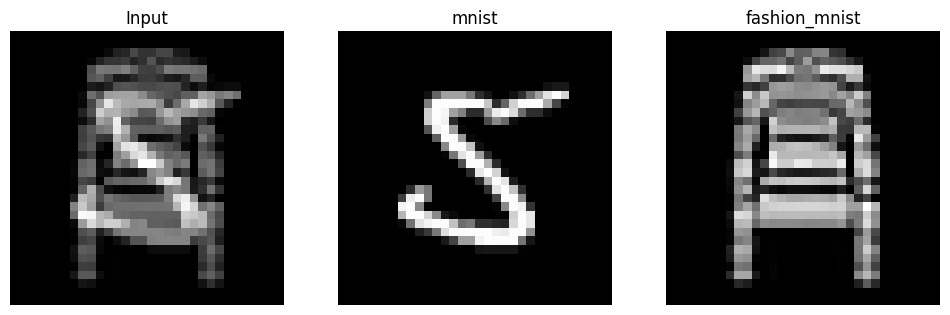

In [32]:
x,(y1,y2)=next(onegen)
show_images(x[0],y1[0],y2[0])

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - conv2d_140_loss: 0.1304 - conv2d_147_loss: 0.2336 - loss: 0.1820 - val_conv2d_140_loss: 0.2223 - val_conv2d_147_loss: 0.2973 - val_loss: 0.2598 - learning_rate: 1.0000e-04
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - conv2d_140_loss: 0.0337 - conv2d_147_loss: 0.0925 - loss: 0.0631 - val_conv2d_140_loss: 0.0277 - val_conv2d_147_loss: 0.0723 - val_loss: 0.0500 - learning_rate: 1.0000e-04
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - conv2d_140_loss: 0.0261 - conv2d_147_loss: 0.0688 - loss: 0.0475 - val_conv2d_140_loss: 0.0259 - val_conv2d_147_loss: 0.0606 - val_loss: 0.0432 - learning_rate: 1.0000e-04
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - conv2d_140_loss: 0.0228 - conv2d_147_loss: 0.0575 - loss: 0.0402 - val_conv2d_140_loss: 0.0208 - val_conv2d_147_loss: 0.0505 - val_loss: 0.0357 - learning_rate: 1.0000e-04
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - conv2d_140_loss: 0.0202 - conv2d_1

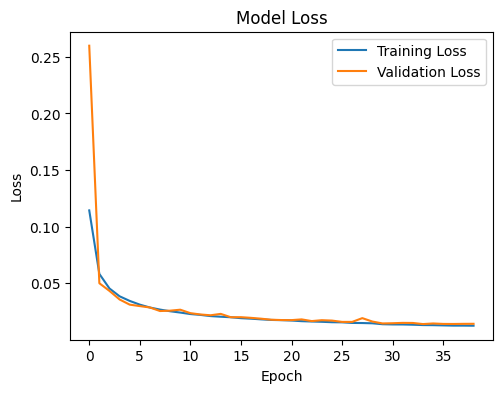

Evaluating model performance...
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE =  0.0010475543297465504
Standard deviation =  7.108464303785558e-06

Showing example predictions...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step


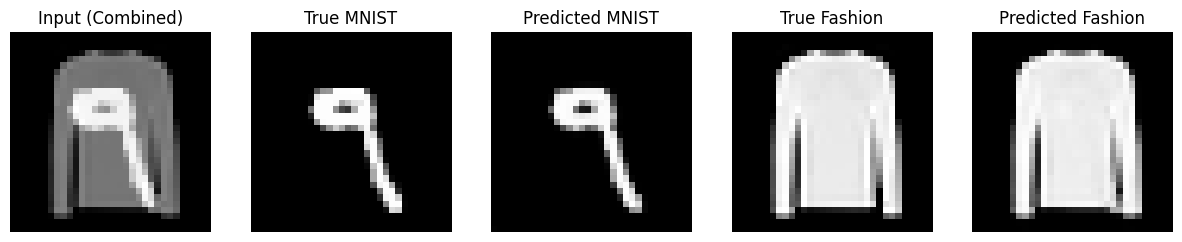

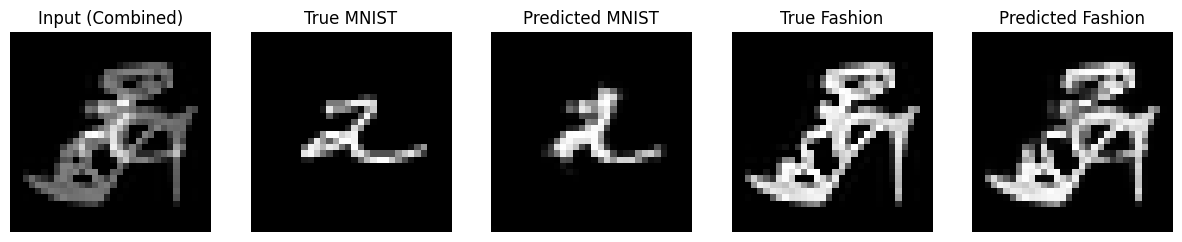

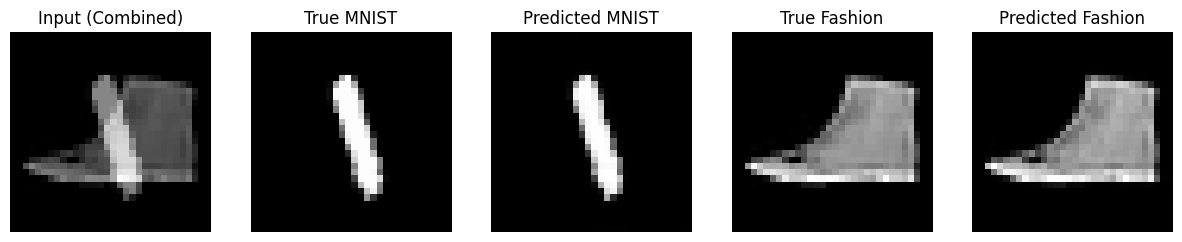

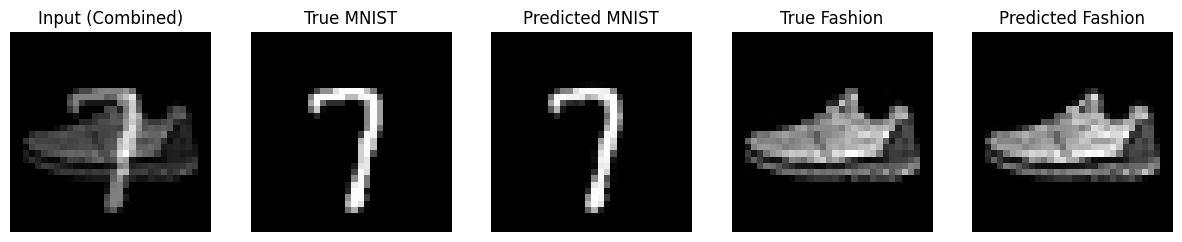

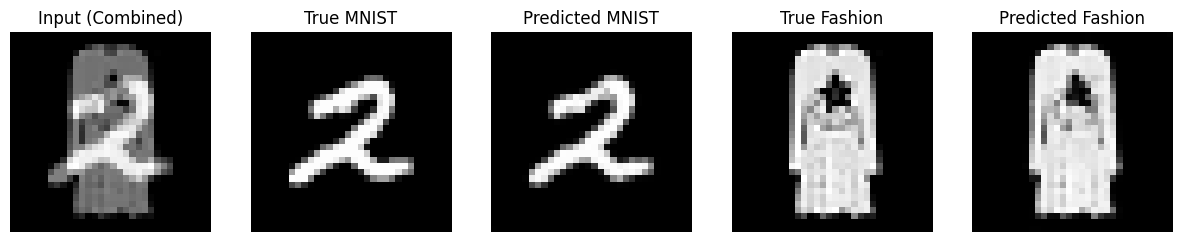

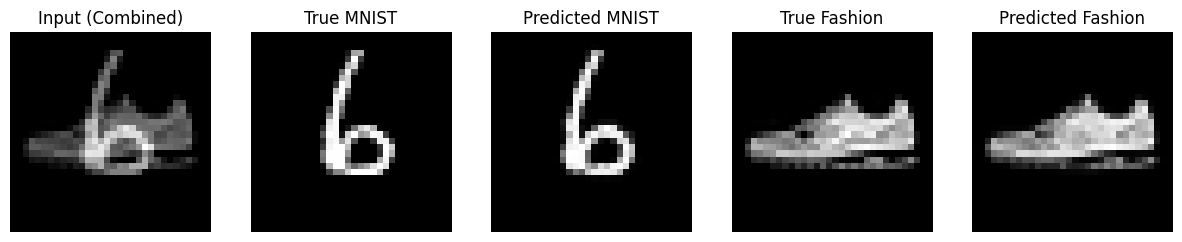

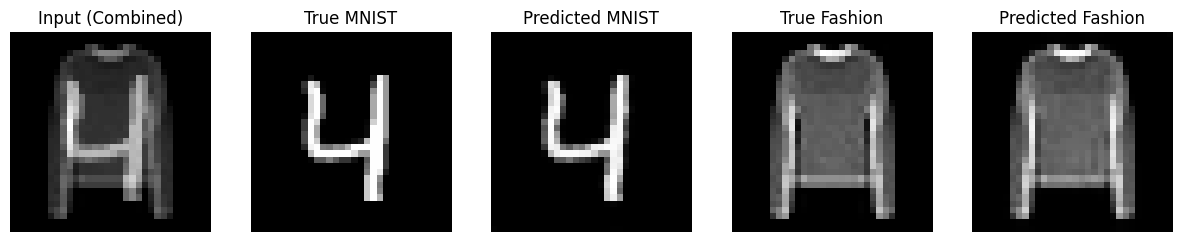

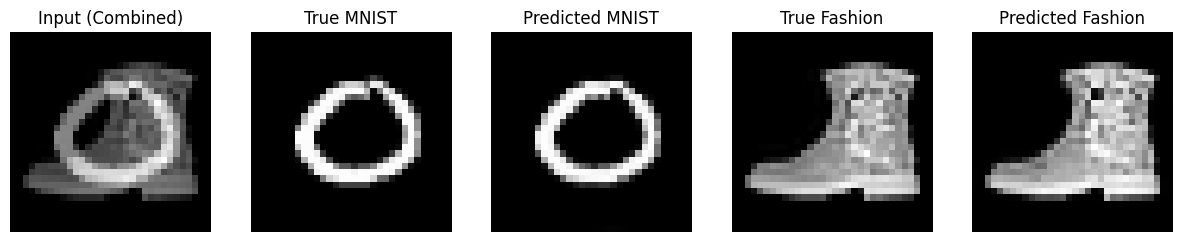

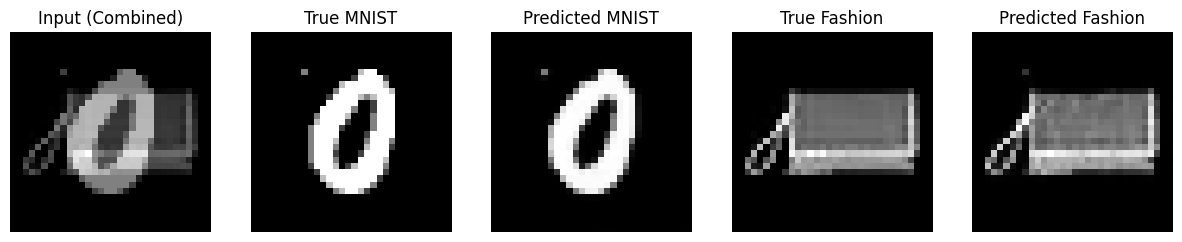

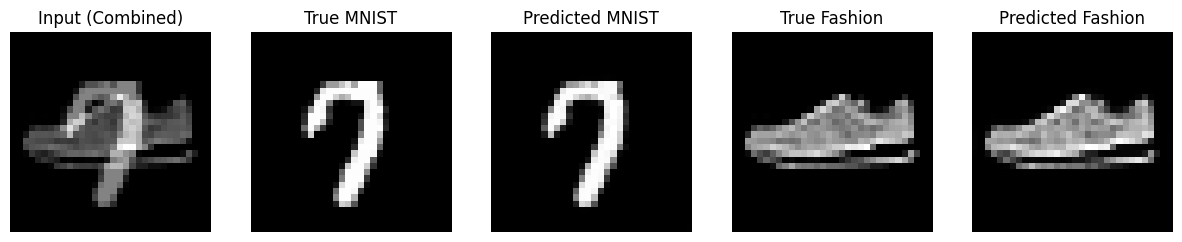

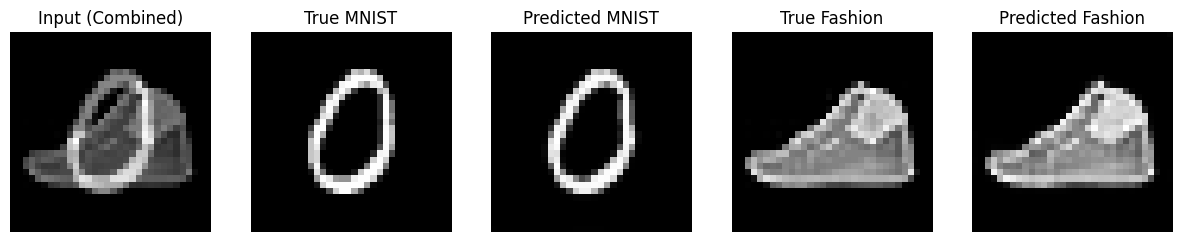

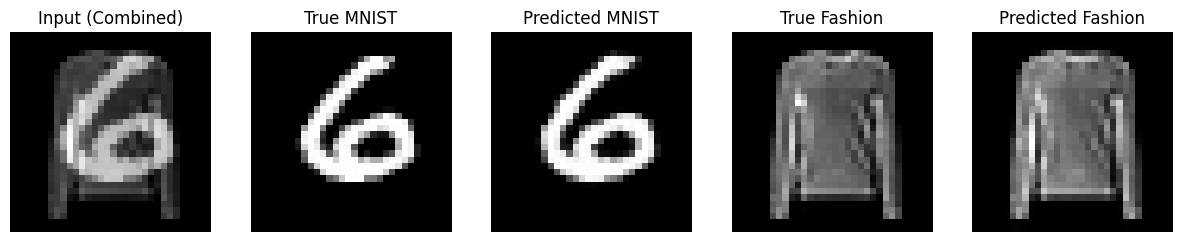

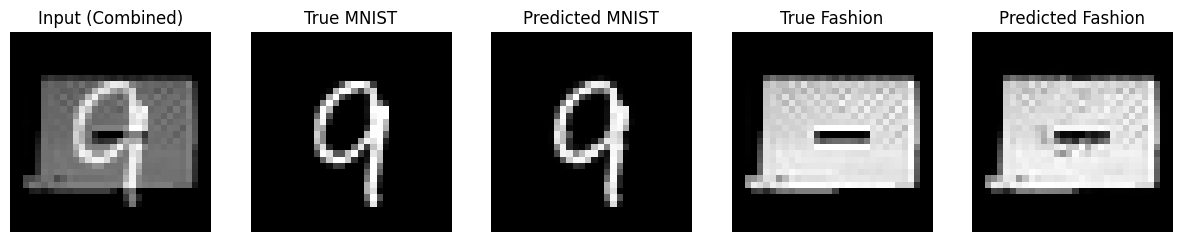

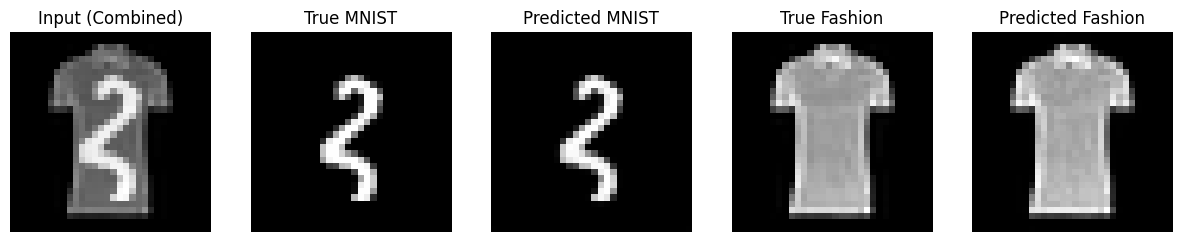

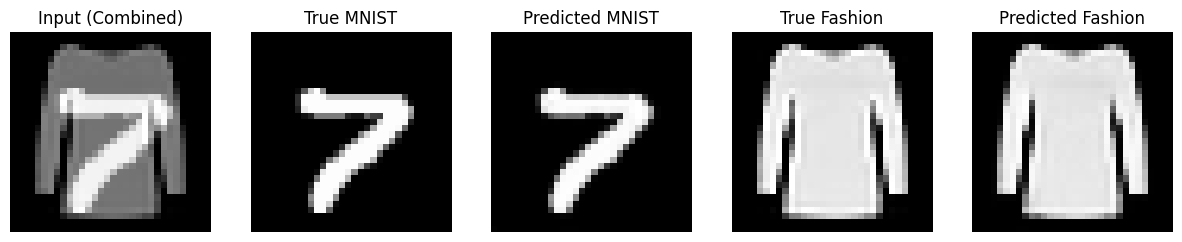

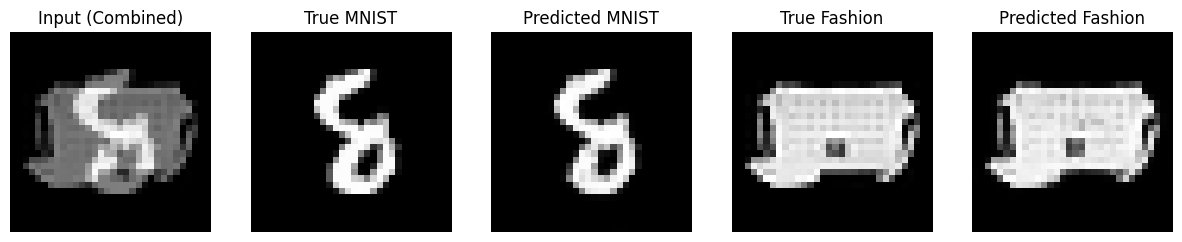

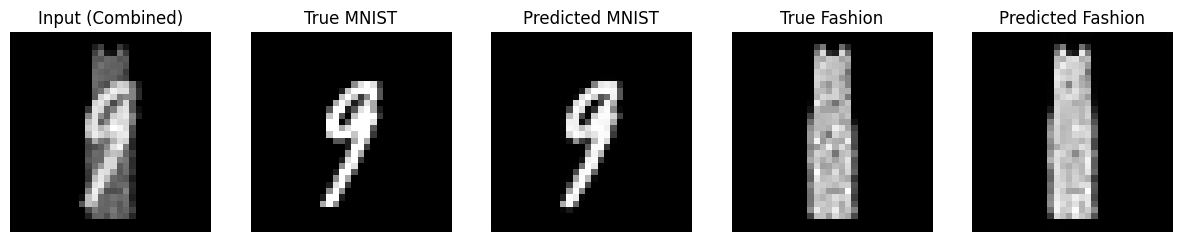

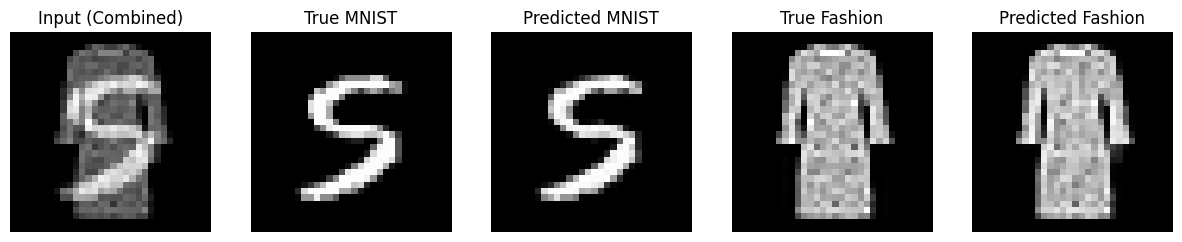

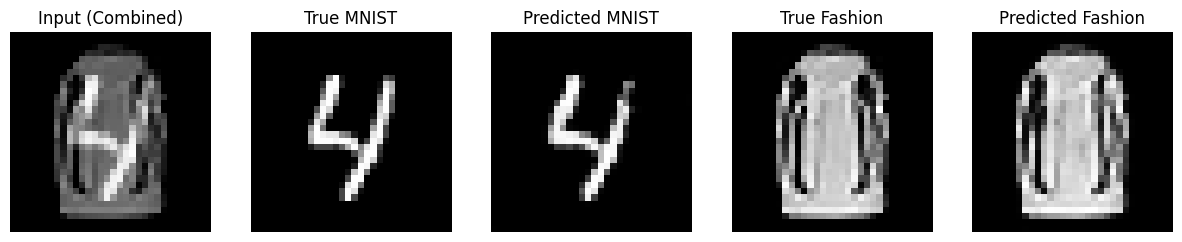

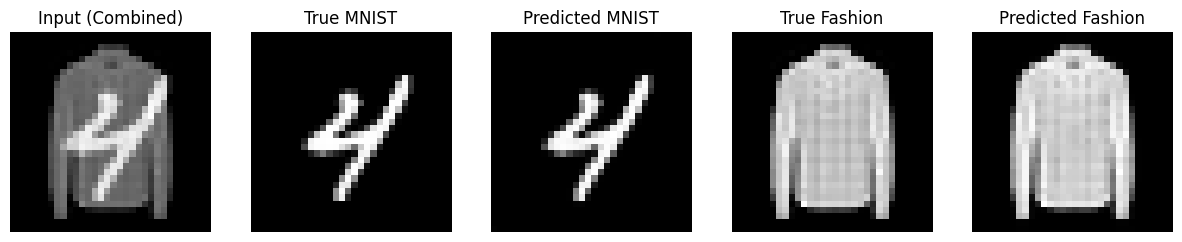

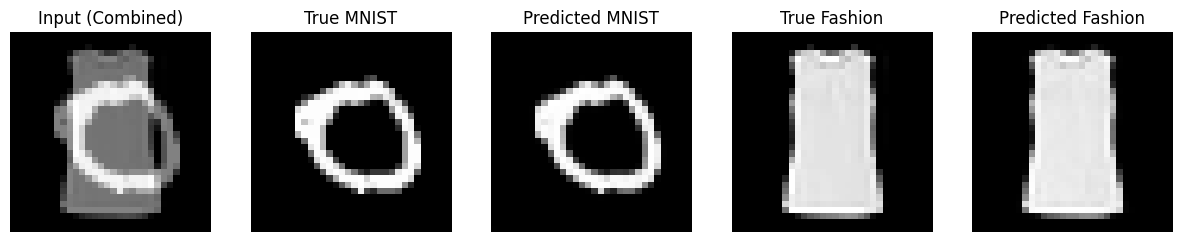

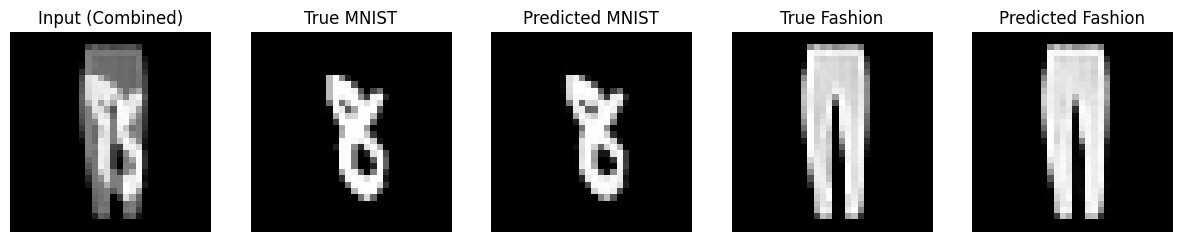

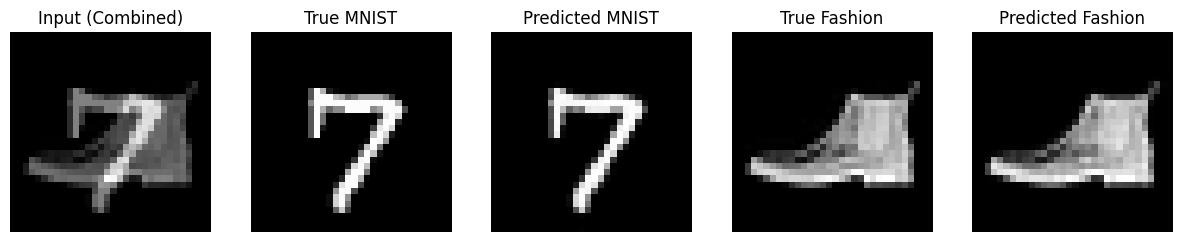

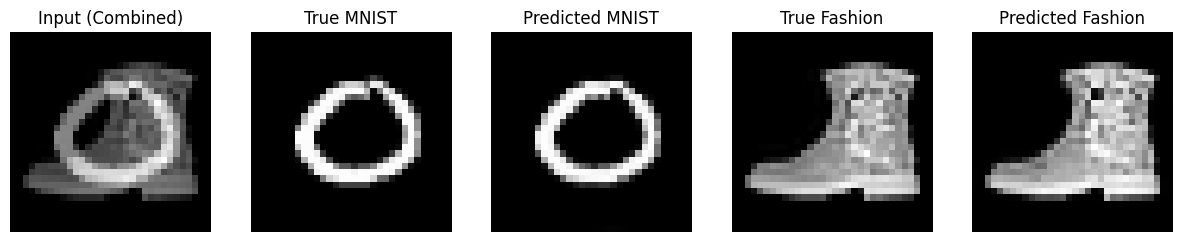

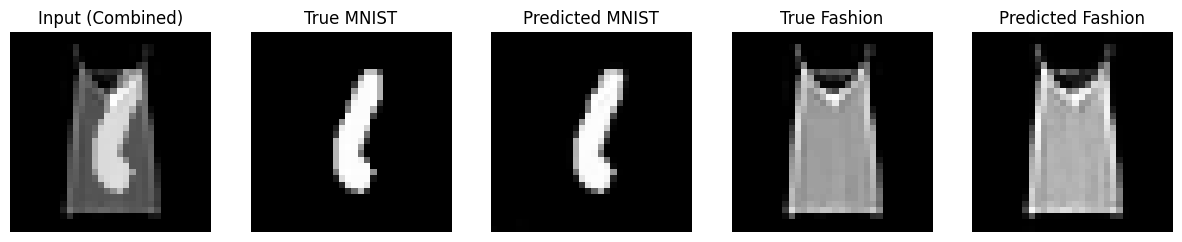

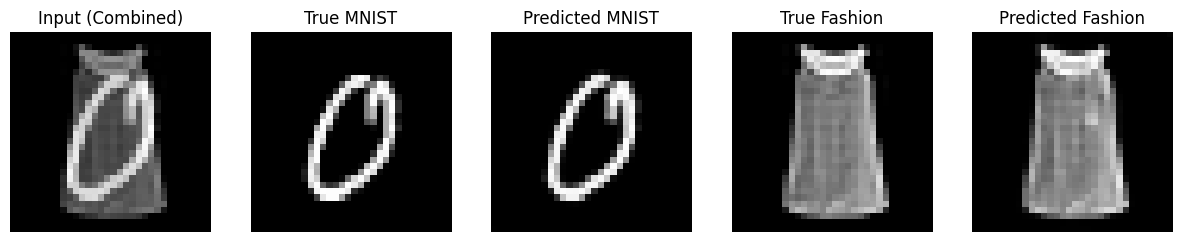

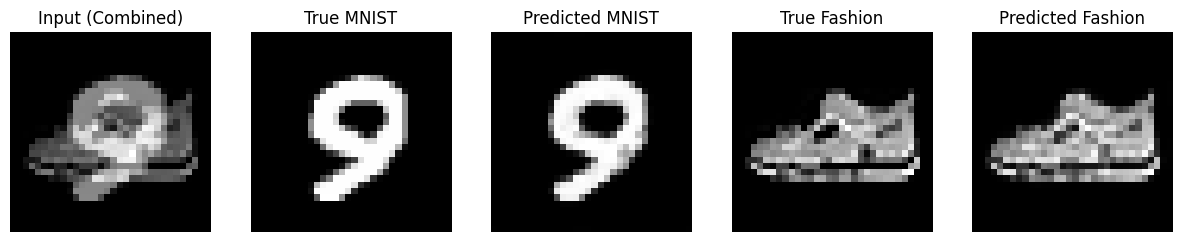

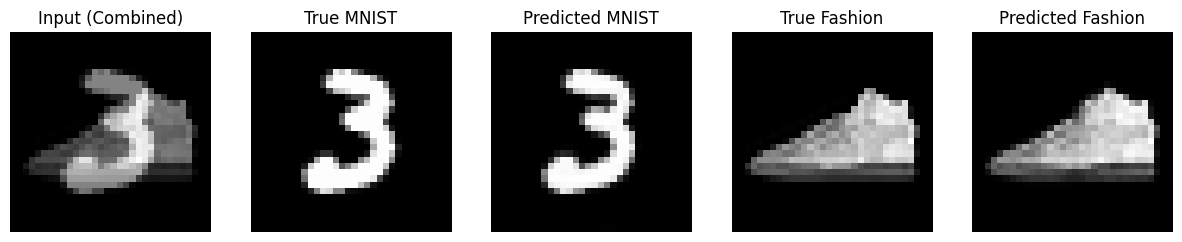

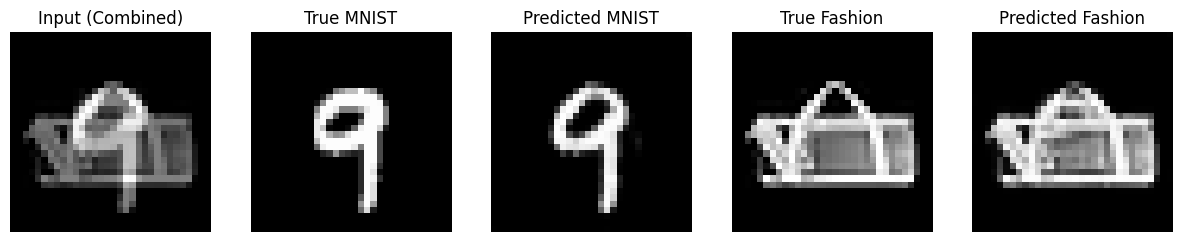

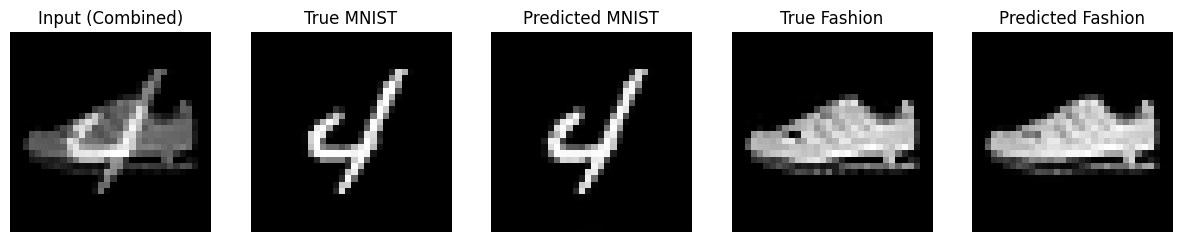

In [33]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input, Concatenate, BatchNormalization, Activation
from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Configure GPU memory growth
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Data Loading and Preprocessing
(mnist_x_train, _), (mnist_x_test, _) = mnist.load_data()
(fashion_x_train, _), (fashion_x_test, _) = fashion_mnist.load_data()

# Pad and normalize
def preprocess(data):
    return np.pad(data, ((0,0),(2,2),(2,2)))/255.0

mnist_x_train = preprocess(mnist_x_train)
mnist_x_test = preprocess(mnist_x_test)
fashion_x_train = preprocess(fashion_x_train)
fashion_x_test = preprocess(fashion_x_test)

# U-Net Model with Skip Connections and Residual Blocks
def residual_block(x, filters):
    shortcut = x
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = layers.add([shortcut, x])
    x = Activation('relu')(x)
    return x

def create_unet():
    inputs = Input(shape=(32, 32, 1))

    # Encoder
    e1 = Conv2D(32, 3, activation='relu', padding='same')(inputs)
    e1 = residual_block(e1, 32)
    p1 = layers.MaxPooling2D()(e1)

    e2 = Conv2D(64, 3, activation='relu', padding='same')(p1)
    e2 = residual_block(e2, 64)
    p2 = layers.MaxPooling2D()(e2)

    # Bottleneck
    b = Conv2D(128, 3, activation='relu', padding='same')(p2)
    b = residual_block(b, 128)

    # Decoder for MNIST
    d1 = UpSampling2D()(b)
    d1 = Concatenate()([d1, e2])
    d1 = Conv2D(64, 3, activation='relu', padding='same')(d1)
    d1 = residual_block(d1, 64)

    d1 = UpSampling2D()(d1)
    d1 = Concatenate()([d1, e1])
    d1 = Conv2D(32, 3, activation='relu', padding='same')(d1)
    d1 = residual_block(d1, 32)
    output1 = Conv2D(1, 3, activation='sigmoid', padding='same')(d1)

    # Decoder for Fashion-MNIST
    d2 = UpSampling2D()(b)
    d2 = Concatenate()([d2, e2])
    d2 = Conv2D(64, 3, activation='relu', padding='same')(d2)
    d2 = residual_block(d2, 64)

    d2 = UpSampling2D()(d2)
    d2 = Concatenate()([d2, e1])
    d2 = Conv2D(32, 3, activation='relu', padding='same')(d2)
    d2 = residual_block(d2, 32)
    output2 = Conv2D(1, 3, activation='sigmoid', padding='same')(d2)

    return Model(inputs, [output1, output2])

# Loss functions
def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

def combined_loss(y_true, y_pred):
    mse = tf.keras.losses.MSE(y_true, y_pred)
    ssim = ssim_loss(y_true, y_pred)
    return mse + 0.5 * ssim

# Create tf.data.Dataset
def create_tf_dataset(x1, x2, batch_size):
    def generator():
        while True:
            idx = np.random.randint(0, len(x1), batch_size)
            mixed = (x1[idx] + x2[idx])/2
            mixed = mixed[..., np.newaxis]
            yield mixed, (x1[idx][..., np.newaxis], x2[idx][..., np.newaxis])

    return tf.data.Dataset.from_generator(
        generator,
        output_signature=(
            tf.TensorSpec(shape=(batch_size, 32, 32, 1), dtype=tf.float32),
            (
                tf.TensorSpec(shape=(batch_size, 32, 32, 1), dtype=tf.float32),
                tf.TensorSpec(shape=(batch_size, 32, 32, 1), dtype=tf.float32)
            )
        )
    )

# Create model and compile
model = create_unet()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer,
             loss=[combined_loss, combined_loss],
             loss_weights=[0.5, 0.5])

# Create datasets
BATCH_SIZE = 32
train_dataset = create_tf_dataset(mnist_x_train, fashion_x_train, BATCH_SIZE)
val_dataset = create_tf_dataset(mnist_x_test, fashion_x_test, BATCH_SIZE)

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=500,
    epochs=50,
    validation_data=val_dataset,
    validation_steps=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=1e-6
        ),
        tf.keras.callbacks.ModelCheckpoint(
            'best_model.weights.h5',  # Corrected file extension
            monitor='val_loss',
            save_best_only=True,
            save_weights_only=True
        )
    ]
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Create test batch function
def create_test_batch(x1, x2, batch_size):
    idx = np.random.randint(0, len(x1), batch_size)
    x_mixed = (x1[idx] + x2[idx])/2
    return x_mixed, (x1[idx], x2[idx])

# Evaluation function
def eval_model(model):
    x, (y1, y2) = create_test_batch(mnist_x_test, fashion_x_test, 5000)
    x = x.reshape(-1, 32, 32, 1)
    pred1, pred2 = model.predict(x, batch_size=32)

    pred1 = pred1.reshape(y1.shape)
    pred2 = pred2.reshape(y2.shape)

    return (np.mean((pred1-y1)**2) + np.mean((pred2-y2)**2)) / 2

# Visualization function
def show_predictions(model, num_samples=3):
    x, (y1, y2) = create_test_batch(mnist_x_test, fashion_x_test, num_samples)
    x_reshaped = x.reshape(-1, 32, 32, 1)
    pred1, pred2 = model.predict(x_reshaped, batch_size=num_samples)
    pred1 = pred1.reshape(-1, 32, 32)
    pred2 = pred2.reshape(-1, 32, 32)

    for i in range(num_samples):
        plt.figure(figsize=(15, 3))

        plt.subplot(1, 5, 1)
        plt.imshow(x[i], cmap='gray')
        plt.title('Input (Combined)')
        plt.axis('off')

        plt.subplot(1, 5, 2)
        plt.imshow(y1[i], cmap='gray')
        plt.title('True MNIST')
        plt.axis('off')

        plt.subplot(1, 5, 3)
        plt.imshow(pred1[i], cmap='gray')
        plt.title('Predicted MNIST')
        plt.axis('off')

        plt.subplot(1, 5, 4)
        plt.imshow(y2[i], cmap='gray')
        plt.title('True Fashion')
        plt.axis('off')

        plt.subplot(1, 5, 5)
        plt.imshow(pred2[i], cmap='gray')
        plt.title('Predicted Fashion')
        plt.axis('off')

        plt.show()

# Evaluate model performance
print("Evaluating model performance...")
repeat_eval = 10
eval_results = []
for i in range(repeat_eval):
    eval_results.append(eval_model(model))
print("MSE = ", np.mean(eval_results))
print("Standard deviation = ", np.std(eval_results))

# Show example predictions
print("\nShowing example predictions...")
show_predictions(model, num_samples=30)

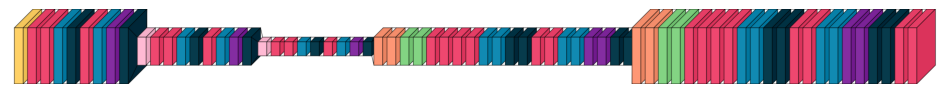

In [40]:
# Import necessary libraries
import visualkeras
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16


# Generate the architecture image using visualkeras
img = visualkeras.layered_view(model)

# Display the image using matplotlib
plt.figure(figsize=(12, 12))  # Adjust the figure size as necessary
plt.imshow(img)  # Display the image
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()


In [42]:
def calculate_accuracy(model, test_batch_size=1000, threshold=0.1):
    """
    Calculate accuracy as percentage of pixels that are within threshold of true value
    threshold: maximum allowed difference between predicted and true pixel values
    """
    # Create test batch
    x, (y1, y2) = create_test_batch(mnist_x_test, fashion_x_test, test_batch_size)
    x = x.reshape(-1, 32, 32, 1)

    # Get predictions
    pred1, pred2 = model.predict(x, batch_size=32)

    # Calculate pixel-wise accuracy
    correct_pixels1 = np.sum(np.abs(pred1.reshape(y1.shape) - y1) < threshold)
    correct_pixels2 = np.sum(np.abs(pred2.reshape(y2.shape) - y2) < threshold)

    total_pixels = test_batch_size * 32 * 32 * 2  # total pixels in both images
    accuracy = (correct_pixels1 + correct_pixels2) / total_pixels * 100

    return accuracy

# Calculate accuracy with different thresholds
thresholds = [0.1, 0.05, 0.01]
for threshold in thresholds:
    accuracy = calculate_accuracy(model, threshold=threshold)
    print(f"Pixel-wise accuracy (threshold={threshold}): {accuracy:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Pixel-wise accuracy (threshold=0.1): 98.24%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Pixel-wise accuracy (threshold=0.05): 95.31%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Pixel-wise accuracy (threshold=0.01): 80.54%


# Model evalaution

Let us define the test generator.

In [48]:
# Create iterator for the test dataset
testgen_iter = iter(testgen)

# Define the ide_model function to return predictions from the trained model
def ide_model(x):
    # Model's prediction (assuming the model takes x and returns two outputs: pred1 and pred2)
    pred1, pred2 = model.predict(x)  # Using the trained model to predict
    return pred1, pred2

# Modify the eval_model function to compute the MSE between predictions and ground truth
def eval_model(model):
    # Get the next batch from the test dataset iterator
    x, (y1, y2) = next(testgen_iter)

    # Get predictions from the model (ide_model uses the actual model's predictions)
    pred1, pred2 = model(x)  # Here, we use the model to get the predictions

    # Calculate MSE for both outputs
    mse1 = np.mean((pred1 - y1)**2)
    mse2 = np.mean((pred2 - y2)**2)

    # Return the average MSE
    return (mse1 + mse2) / 2

# Evaluation loop
repeat_eval = 10
eval_results = []
for i in range(repeat_eval):
    eval_results.append(eval_model(ide_model))  # Evaluate using ide_model that returns predictions
    # You can print MSE for each evaluation if you like
    # print(f"Evaluation {i+1} MSE: {eval_results[-1]}")

# Calculate and print final MSE and standard deviation of MSE
print("Mean Squared Error (MSE) = ", np.mean(eval_results))
print("Standard deviation = ", np.std(eval_results))


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error (MSE) =  0.0010614793747663498
Standard deviation =  2.3971399247354464e-05


We test a model returning twice the input image. You will need to replace it with your own predictive model.

In [44]:
def ide_model(x):
   return((x,x))

In [45]:
def eval_model(model):
  x, (y1,y2) = next(testgen)

  # use model.predict to get predictions. Here we just call model
  pred1,pred2 = model(x)

  return (np.mean((pred1-y1)**2) + np.mean((pred2-y2)**2) / 2)

In [46]:
repeat_eval = 10
eval_results = []
for i in range(repeat_eval):
  eval_results.append(eval_model(ide_model))
print("mse = ", np.mean(eval_results))
print("standard deviation = ", np.std(eval_results))

mse =  0.054521481324790934
standard deviation =  0.00018222900806602255


# What to deliver
As usual, you are supposed to deliver a single notebook that is supposed to run on colab. The notebook should be adequately commented, contain a full trace of the training, the computation of the mse in the form specified above and a few examples.

Good Work!